In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [5]:
#Importing Libraries
import tensorflow 
import numpy as np 
import pandas as pd 
from collections import Counter
import random
import IPython
from IPython.display import Image, Audio
import music21
from music21 import *
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Concatenate
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import Adamax
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import sys
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
np.random.seed(42)

In [6]:
import os 
#Loading the list of chopin's midi files as stream 
filepath = "/Users/taeyoon/Downloads/archive/chopin/"
#Getting midi files
all_midis= []
for i in os.listdir(filepath):
    print(i)
    if i.endswith(".mid"):
        tr = filepath+i
        try:
            if os.path.exists(filepath):
                #print("file path exists!")
                midi = converter.parse(tr)
                all_midis.append(midi)
            else: 
                print("file does not exist")
        except Exception as e: 
            #pass
            print(f"An error occurred: {e}")
all_midis

Orchestersuite_Nr._2_5._Polonaise.mid
Lukas_Passion,_BWV_246_96._Chorale_Derselbe_mein_Herr_Jesu_Christ.mid
2-Part_Invention_No._4_in_D_minor,_BWV_775.mid
Jesus_bleibet_meine_Freude_Herz_und_Mund_und_Tat_und_Leben_BWV._147_.mid
Air_On_The_G_String.mid
Air_On_The_G_String.1.mid
Fugue_22_B_Flat_Minor.mid
Fugue.mid
Italian_Concerto_Allegro.mid
Musette_BWV_Anh.126.mid
2-Part_Invention_No._8_in_F_major,_BWV_779.mid
Brandenburgisches_Konzert_Nr._1_F-Dur,_BWV_1046_IV._Menuet-Trio-Menuet-Polonaise-Menuet-Trio-Menuet.mid
Franzosische_Suite_Nr._5,_BWV_816,_Gigue.1.mid
Sarabande.mid
Italian_Concerto-Presto.mid
Fugue_16_G_Minor.mid
Toccata.mid
Jesus_bleibet_meine_Freude_Herz_und_Mund_und_Tat_und_Leben_BWV._147_.2.mid
Toccata_and_Fugue_in_D_minor,_BWV_565.1.mid
Jesus_bleibet_meine_Freude_Herz_und_Mund_und_Tat_und_Leben_BWV._147_.1.mid
Partita_No._1_in_B-flat_major,_BWV_825_VI._Gigue.mid
2-Part_Invention_No._1_in_C_major,_BWV_772.mid
Toccata_and_Fugue_in_D_minor,_BWV_565.2.mid
Toccato_und_Fuge_F-Dur

[<music21.stream.Score 0x2932e7810>,
 <music21.stream.Score 0x29ba0ef50>,
 <music21.stream.Score 0x28f941c10>,
 <music21.stream.Score 0x2df69f750>,
 <music21.stream.Score 0x2defbb2d0>,
 <music21.stream.Score 0x2e1130110>,
 <music21.stream.Score 0x2dbcce350>,
 <music21.stream.Score 0x2de8ba850>,
 <music21.stream.Score 0x2dfd4c310>,
 <music21.stream.Score 0x2e0057590>,
 <music21.stream.Score 0x2e4639a90>,
 <music21.stream.Score 0x2dff1d450>,
 <music21.stream.Score 0x2e44fb790>,
 <music21.stream.Score 0x2e5d1f590>,
 <music21.stream.Score 0x2e4605d50>,
 <music21.stream.Score 0x2df278d90>,
 <music21.stream.Score 0x2e01cda50>,
 <music21.stream.Score 0x2e5db23d0>,
 <music21.stream.Score 0x2e805f0d0>,
 <music21.stream.Score 0x2e1743f10>,
 <music21.stream.Score 0x2e5608910>,
 <music21.stream.Score 0x2e4604310>,
 <music21.stream.Score 0x2e2b36b50>,
 <music21.stream.Score 0x2e61769d0>,
 <music21.stream.Score 0x2e9e25e50>,
 <music21.stream.Score 0x2e6fd9190>,
 <music21.stream.Score 0x2e5817550>,
 

Next, I get the components out of these streams of MIDI files. The midi files only have the piano included as mentioned in the dataset. So the components of the file would be either piano chords or piano notes. 

**Note:** The musical notes are the building blocks of the music. It pertains to a pitch associated with a specific audio vibration. Western music utilizes twelve musical notes. 

**Chord:** A group of notes that sound good together is a chord.

The music21 stream that was created in the above cell contains both, chords and notes, we will extract them in the form of notes and obtain a series of notes in the musical composition.

**The function to get the notes:**

In [7]:
#Helping function        
def extract_notes(file):
    notes = []
    duration = []
    pick = None
    for j in file:
        songs = instrument.partitionByInstrument(j)
        for part in songs.parts:
            pick = part.recurse()
            for element in pick:
                if isinstance(element, note.Note):
                    notes.append(str(element.pitch))
                    duration.append(element.quarterLength)
                elif isinstance(element, chord.Chord):
                    notes.append(".".join(str(n) for n in element.normalOrder))
                    #chord_notes = '.'.join(str(n) for n in element.pitches)
                    durations = element.duration.quarterLength
                    duration.append(durations)

    return notes, duration
#Getting the list of notes as Corpus
Corpus, NoteDurations = extract_notes(all_midis)
print("Total notes in all the Chopin midis in the dataset:", len(Corpus))

Total notes in all the Chopin midis in the dataset: 90488


In [8]:
print("First fifty values in the Corpus:", Corpus[:50])

First fifty values in the Corpus: ['A3', 'F3', 'F5', 'B-3', '5.7', '0.5', 'G5', 'A5', 'G5', 'A5', '0.5', '9.10', 'G5', 'F5', '0.4', 'G5', 'G5', '7.9', '11.2', 'F5', 'E5', '2.4', '0', 'C5', 'D3', '5.9', 'E-3', 'D3', 'C3', 'B-2', '2.5', 'B-3', 'A3', '0.5', 'A2', 'G2', 'B-4', 'F3', '0.2', 'E3', 'B-4', 'C3', '7.9', 'F3', 'A4', 'C3', 'B-2', 'F4', 'C3', '5']


In [9]:
print("First fifty nute durations in the Corpus:", NoteDurations[:50])

First fifty nute durations in the Corpus: [0.25, Fraction(2, 3), 0.25, 0.25, 0.25, 0.75, 0.25, 0.5, 0.25, 0.25, 0.75, 0.25, 0.25, 0.25, 0.5, 0.25, 0.25, 0.25, 0.75, 0.5, 0.25, 0.25, 0.75, 0.25, 0.25, 0.75, 0.25, 0.25, 0.25, 0.25, 0.75, 0.25, 0.25, 0.75, 0.25, 0.25, 0.75, 0.25, 0.25, 0.25, 0.5, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.75]


**Examine all the notes in the Corpus** 

In [10]:
#Creating a count dictionary
count_num = Counter(Corpus)
print("Total unique notes in the Corpus:", len(count_num))

Total unique notes in the Corpus: 480


In [11]:
#Creating a count dictionary
dur_count_num = Counter(NoteDurations)
print("Total unique notes in the Corpus:", len(dur_count_num)) 

Total unique notes in the Corpus: 89


In [12]:
#Exploring the notes dictionary
Notes = list(count_num.keys())
Recurrence = list(count_num.values())
#Average recurrenc for a note in Corpus
def Average(lst):
    return sum(lst) / len(lst)
print("Average recurrenc for a note in Corpus:", Average(Recurrence))
print("Most frequent note in Corpus appeared:", max(Recurrence), "times")
print("Least frequent note in Corpus appeared:", min(Recurrence), "time")

Average recurrenc for a note in Corpus: 188.51666666666668
Most frequent note in Corpus appeared: 4108 times
Least frequent note in Corpus appeared: 1 time


Clearly, there are some very rare notes in the melody; some so rare that it was played only once in the whole data. This would create a lot of problems. (I did run into most of them while writing this piece)
To spare us the error reports, let us have a look at the frequency of the notes. 
And for simplicity, I shall be eliminating some of the least occurring notes. I am sure Chopin wouldn't mind me messing with his masterpiece for science or would he? Either way, I may never know!   

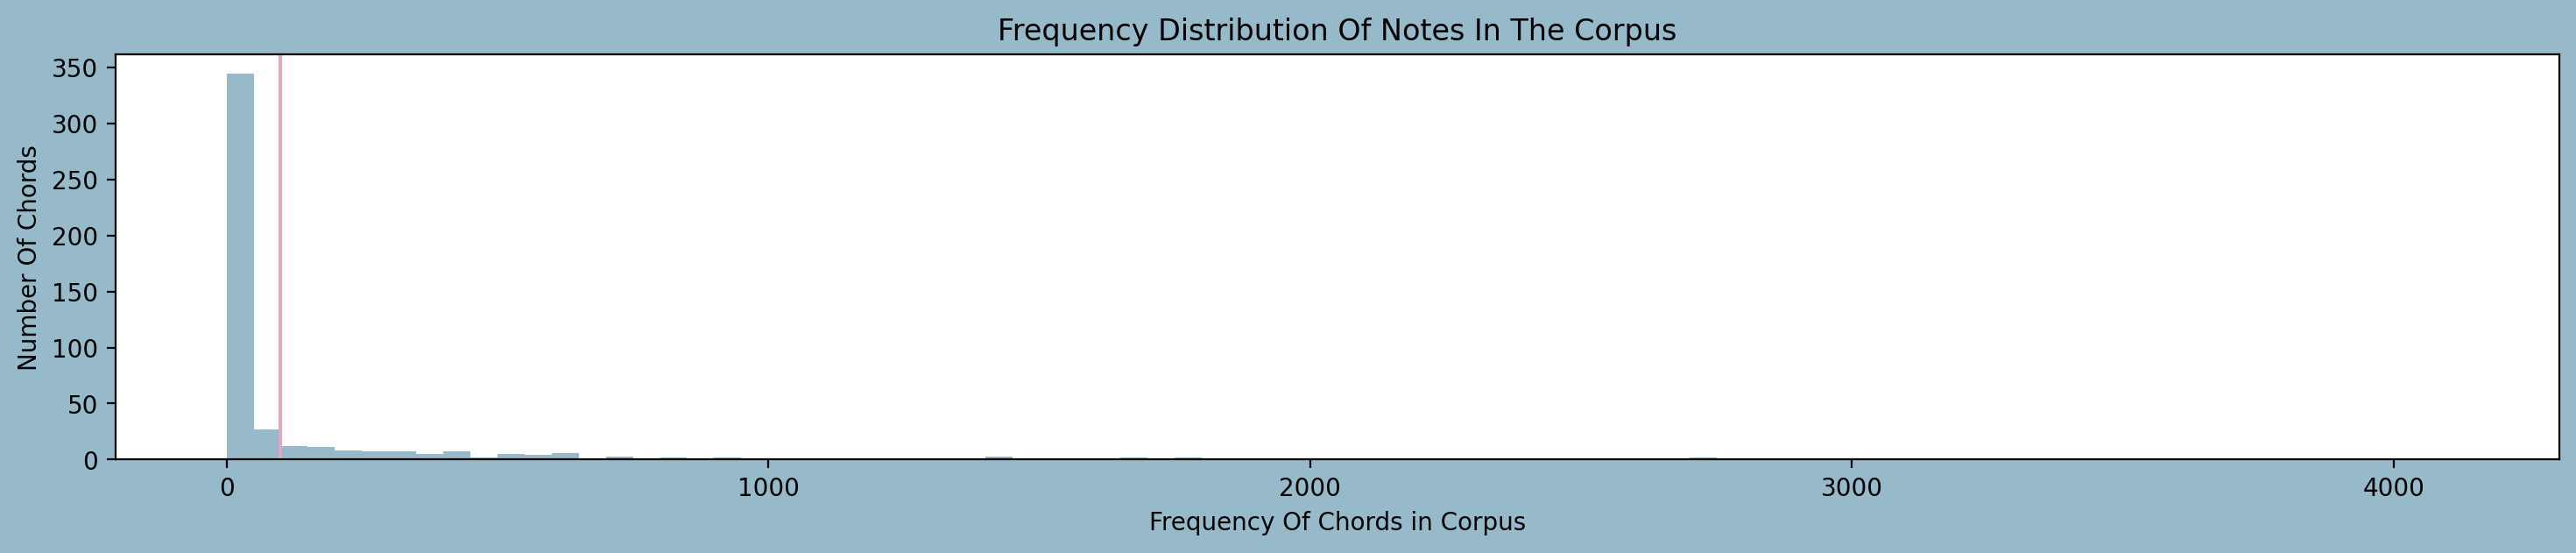

In [13]:
# Plotting the distribution of Notes
plt.figure(figsize=(18,3),facecolor="#97BACB")
bins = np.arange(0,(max(Recurrence)), 50) 
plt.hist(Recurrence, bins=bins, color="#97BACB")
plt.axvline(x=100,color="#DBACC1")
plt.title("Frequency Distribution Of Notes In The Corpus")
plt.xlabel("Frequency Of Chords in Corpus")
plt.ylabel("Number Of Chords")
plt.show()

I have decided, I will be taking out the notes that were played less than 100 times. I mean, if Chopin liked them he would have played it a lot more often. So I create a list of rare notes in the next section. 

In [14]:
# Getting a list of rare chords
rare_note = [key for key, value in count_num.items() if value < 100]

print("Total number of notes that occur less than 100 times:", len(rare_note))

# Eliminating the rare notes and corresponding durations
filtered_Corpus = []
filtered_Durations = []

for notee, duration in zip(Corpus, NoteDurations):
    if notee not in rare_note:
        filtered_Corpus.append(notee)
        filtered_Durations.append(duration)
        
print("Length of Corpus after eliminating the rare notes:", len(filtered_Corpus))
print("Length of NotesDurations after eliminating the rare notes:", len(filtered_Durations))



Total number of notes that occur less than 100 times: 371
Length of Corpus after eliminating the rare notes: 85885
Length of NotesDurations after eliminating the rare notes: 85885


In [15]:
# Updating the original lists
Corpus = filtered_Corpus
NotesDurations = filtered_Durations

# Printing the final lists (optional)
print("Filtered Corpus:", Corpus)
print("Filtered NotesDurations:", NotesDurations)

Filtered Corpus: ['A3', 'F3', 'F5', 'B-3', '5.7', '0.5', 'G5', 'A5', 'G5', 'A5', '0.5', '9.10', 'G5', 'F5', '0.4', 'G5', 'G5', '7.9', '11.2', 'F5', 'E5', '2.4', '0', 'C5', 'D3', '5.9', 'E-3', 'D3', 'C3', 'B-2', '2.5', 'B-3', 'A3', '0.5', 'A2', 'G2', 'B-4', 'F3', '0.2', 'E3', 'B-4', 'C3', '7.9', 'F3', 'A4', 'C3', 'B-2', 'F4', 'C3', '5', 'A4', '10.0', '5.10', 'D5', 'D5', 'E5', '5.9', 'C5', '2.5', 'C5', 'B-4', '0.2', 'C5', '4.7', 'B-4', '7.9', 'F3', 'A4', 'E3', 'F3', 'F4', 'G3', 'A3', 'G3', 'F5', 'F3', 'F5', '2.4', 'B-3', 'C4', 'C5', 'D4', 'B-4', 'B-3', 'A4', 'C4', 'G4', 'B-4', 'C3', 'A4', 'G4', 'F3', 'G4', 'C3', 'F4', 'A2', 'F2', 'A3', 'F3', 'F5', 'B-3', '5.7', '0.5', 'G5', 'A5', '7.9', '0.5', '9.10', 'G5', 'F5', '0.4', 'G5', '7.9', '11.2', 'G5', 'F5', 'E5', 'D5', '0', 'E5', 'C5', 'D3', '5.9', 'E-3', 'D3', 'C3', 'B-2', '2.5', 'B-3', 'A3', '0.5', 'A2', 'G2', 'B-4', 'F3', '0.2', 'C5', 'E3', 'B-4', 'C3', '7.9', '0.5', 'A4', 'B-2', 'F4', 'C3', '5', 'A4', '5.10', '2.4', '5.9', 'C5', '2.5', 'C

In [16]:
# Storing all the unique characters present in my corpus to bult a mapping dict. 
symb = sorted(list(set(Corpus)))

L_corpus = len(Corpus) #length of corpus
L_symb = len(symb) #length of total unique characters
L_symb_dur = len(list(set(NoteDurations))) #length of total unique note durations

#Building dictionary to access the vocabulary from indices and vice versa
mapping = dict((c, i) for i, c in enumerate(symb))
reverse_mapping = dict((i, c) for i, c in enumerate(symb))

print("Total number of characters:", L_corpus)
print("Number of unique characters:", L_symb)

Total number of characters: 85885
Number of unique characters: 109


In [17]:
# Storing all the unique characters present in my corpus to bult a mapping dict. 
symb_2 = sorted(list(set(NoteDurations)))
symb_2_durations = len(NoteDurations)


#Building dictionary to access the vocabulary from indices and vice versa
mapping_2 = dict((c, i) for i, c in enumerate(symb_2))
reverse_mapping_2= dict((i, c) for i, c in enumerate(symb_2))

print("Total number of durations:", symb_2_durations)
print("Number of unique durations:", L_symb_dur)

Total number of durations: 90488
Number of unique durations: 89


**Encoding and Splitting the Corpus as Labels and Targets**

In [18]:
#Splitting the Corpus in equal length of strings and output target
length = 40
note_features = []
note_targets = []
duration_features = []
duration_targets = []
for i in range(0, L_corpus - length, 1):
    note_feature = Corpus[i:i + length]
    note_target = Corpus[i + length]
    
    duration_feature = NoteDurations[i:i + length]
    duration_target = NoteDurations[i + length]
    
    note_features.append([mapping[j] for j in note_feature])
    note_targets.append(mapping[note_target])
    
    duration_features.append([mapping_2[j] for j in duration_feature])
    duration_targets.append(mapping_2[duration_target])
    
    
    
L_datapoints = len(note_targets)
print("Total number of sequences in the Corpus:", L_datapoints)

Total number of sequences in the Corpus: 85845


In [19]:
# reshape X and normalize
X_notes = (np.reshape(note_features, (L_datapoints, length, 1)))/ float(L_symb)
X_durations = (np.reshape(duration_features, (L_datapoints, length, 1)))/ float(L_symb_dur)
# one hot encode the output variable
y_notes = tensorflow.keras.utils.to_categorical(note_targets) 
y_durations = tensorflow.keras.utils.to_categorical(duration_targets) 
y = np.concatenate([y_notes, y_durations], axis=1)

**Splitting Train and Seed datasets**

In [20]:
X_durations = X_durations.astype(np.float64) #crucial

In [21]:
#Taking out a subset of data to be used as seed
train_idx, test_idx = train_test_split(np.arange(np.shape(y_notes)[0]), random_state=42)
X_train_notes, X_train_durations, y_train_notes, y_train_durations = X_notes[train_idx], X_durations[train_idx], y_notes[train_idx], y_durations[train_idx]
X_seed_notes, X_seed_durations, y_seed_notes, y_seed_durations = X_notes[test_idx], X_durations[test_idx], y_notes[test_idx], y_durations[test_idx]
#X_train, X_seed, y_train, y_seed = train_test_split(X, y, test_size=0.2, random_state=42)

<a id="5"></a>
# <p style="background-color:#97BACB;font-family:newtimeroman;color:#EBDDD0;font-size:120%;text-align:center;border-radius:40px 40px;">MODEL BUILDING</p>

I will be employing an LSTM for this project.

**Following steps are involved in the model building**

* Initialising the Model
* Defining by adding layers
* Compiling the Model
* Training the Model

**Building the Model**

In [22]:
from keras.layers import Input, LSTM, Dropout, Concatenate, Dense
from keras.models import Model
from keras.optimizers import Adamax

# Input branches
notes_input = Input(shape=(X_train_notes.shape[1], X_train_notes.shape[2]), name='notes_input')
durations_input = Input(shape=(X_train_durations.shape[1], X_train_durations.shape[2]), name='durations_input')

# Notes branch
notes_lstm1 = LSTM(512, return_sequences=True)(notes_input)
notes_dropout1 = Dropout(0.1)(notes_lstm1)
notes_lstm2 = LSTM(256)(notes_dropout1)

# Durations branch
durations_lstm1 = LSTM(512, return_sequences=True)(durations_input)
durations_dropout1 = Dropout(0.1)(durations_lstm1)
durations_lstm2 = LSTM(256)(durations_dropout1)

# Concatenation of both branches
concatenated = Concatenate()([notes_lstm2, durations_lstm2])

# Dense layers with dropout
dense1 = Dense(256)(concatenated)
dropout2 = Dropout(0.1)(dense1)

# Output layers for notes and durations
notes_output = Dense(y_notes.shape[1], activation='softmax', name='notes_output')(dropout2)
durations_output = Dense(y_durations.shape[1], activation='softmax', name='durations_output')(dropout2)

# Define and compile the model
model = Model(inputs=[notes_input, durations_input], outputs=[notes_output, durations_output])
opt = Adamax(learning_rate=0.01)
model.compile(loss={'notes_output': 'categorical_crossentropy', 'durations_output': 'categorical_crossentropy'},
              optimizer=opt,
              metrics={'notes_output': 'accuracy', 'durations_output': 'accuracy'})

# Summary of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 notes_input (InputLayer)    [(None, 40, 1)]              0         []                            
                                                                                                  
 durations_input (InputLaye  [(None, 40, 1)]              0         []                            
 r)                                                                                               
                                                                                                  
 lstm (LSTM)                 (None, 40, 512)              1052672   ['notes_input[0][0]']         
                                                                                                  
 lstm_2 (LSTM)               (None, 40, 512)              1052672   ['durations_input[0][0]'] 

In [23]:
def chords_n_notes(Snippet, dur_lst):  
    Melody = []  
    offset = 0 #Incremental  
    for duration, i in zip(dur_lst, Snippet):  
        #If it is chord  
        if ("." in i or i.isdigit()):  
            chord_notes = i.split(".") #Seperating the notes in chord  
            notes = []   
            for j in chord_notes:  
                inst_note=int(j)  
                note_snip = note.Note(inst_note)              
                notes.append(note_snip)  
                chord_snip = chord.Chord(notes)  
                chord_snip.offset = offset  
                chord_snip.quarterLength = duration  
                Melody.append(chord_snip)  
        # pattern is a note  
        else:   
            note_snip = note.Note(i) #why is note = 2.7 here?   
            note_snip.offset = offset  
            note_snip.duration.quarterLength = duration  
              
            Melody.append(note_snip)  
        # increase offset each iteration so that notes do not stack  
        offset += duration  
    Melody_midi = stream.Stream(Melody)     
    return Melody_midi  


In [24]:
y_train_durations

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [25]:
y_train_notes

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
history = model.fit([X_train_notes, X_train_durations], [y_train_notes, y_train_durations], epochs=50, batch_size=64)

Epoch 1/3
1006/1006 [==============================] - 392s 387ms/step - loss: 6.1219 - notes_output_loss: 4.2795 - durations_output_loss: 1.8424 - notes_output_accuracy: 0.0426 - durations_output_accuracy: 0.4084
Epoch 2/3
1006/1006 [==============================] - 423s 420ms/step - loss: 6.0383 - notes_output_loss: 4.2477 - durations_output_loss: 1.7905 - notes_output_accuracy: 0.0425 - durations_output_accuracy: 0.4132
Epoch 3/3
1006/1006 [==============================] - 437s 434ms/step - loss: 6.0271 - notes_output_loss: 4.2392 - durations_output_loss: 1.7878 - notes_output_accuracy: 0.0433 - durations_output_accuracy: 0.4133


<a id="6"></a>
# <p style="background-color:#97BACB;font-family:newtimeroman;color:#EBDDD0;font-size:120%;text-align:center;border-radius:40px 40px;">EVALUATING MODELS</p>

Now that I have my model trained on the MIDI files of piano music, let us see how it performs. 

**To evaluate my model, I shall be having a look at:**
* The performance of the model via Learning Curves
* The melody created

**Plotting the learning curve for the loss function**

[Text(0.5, 0, 'Epochs')]

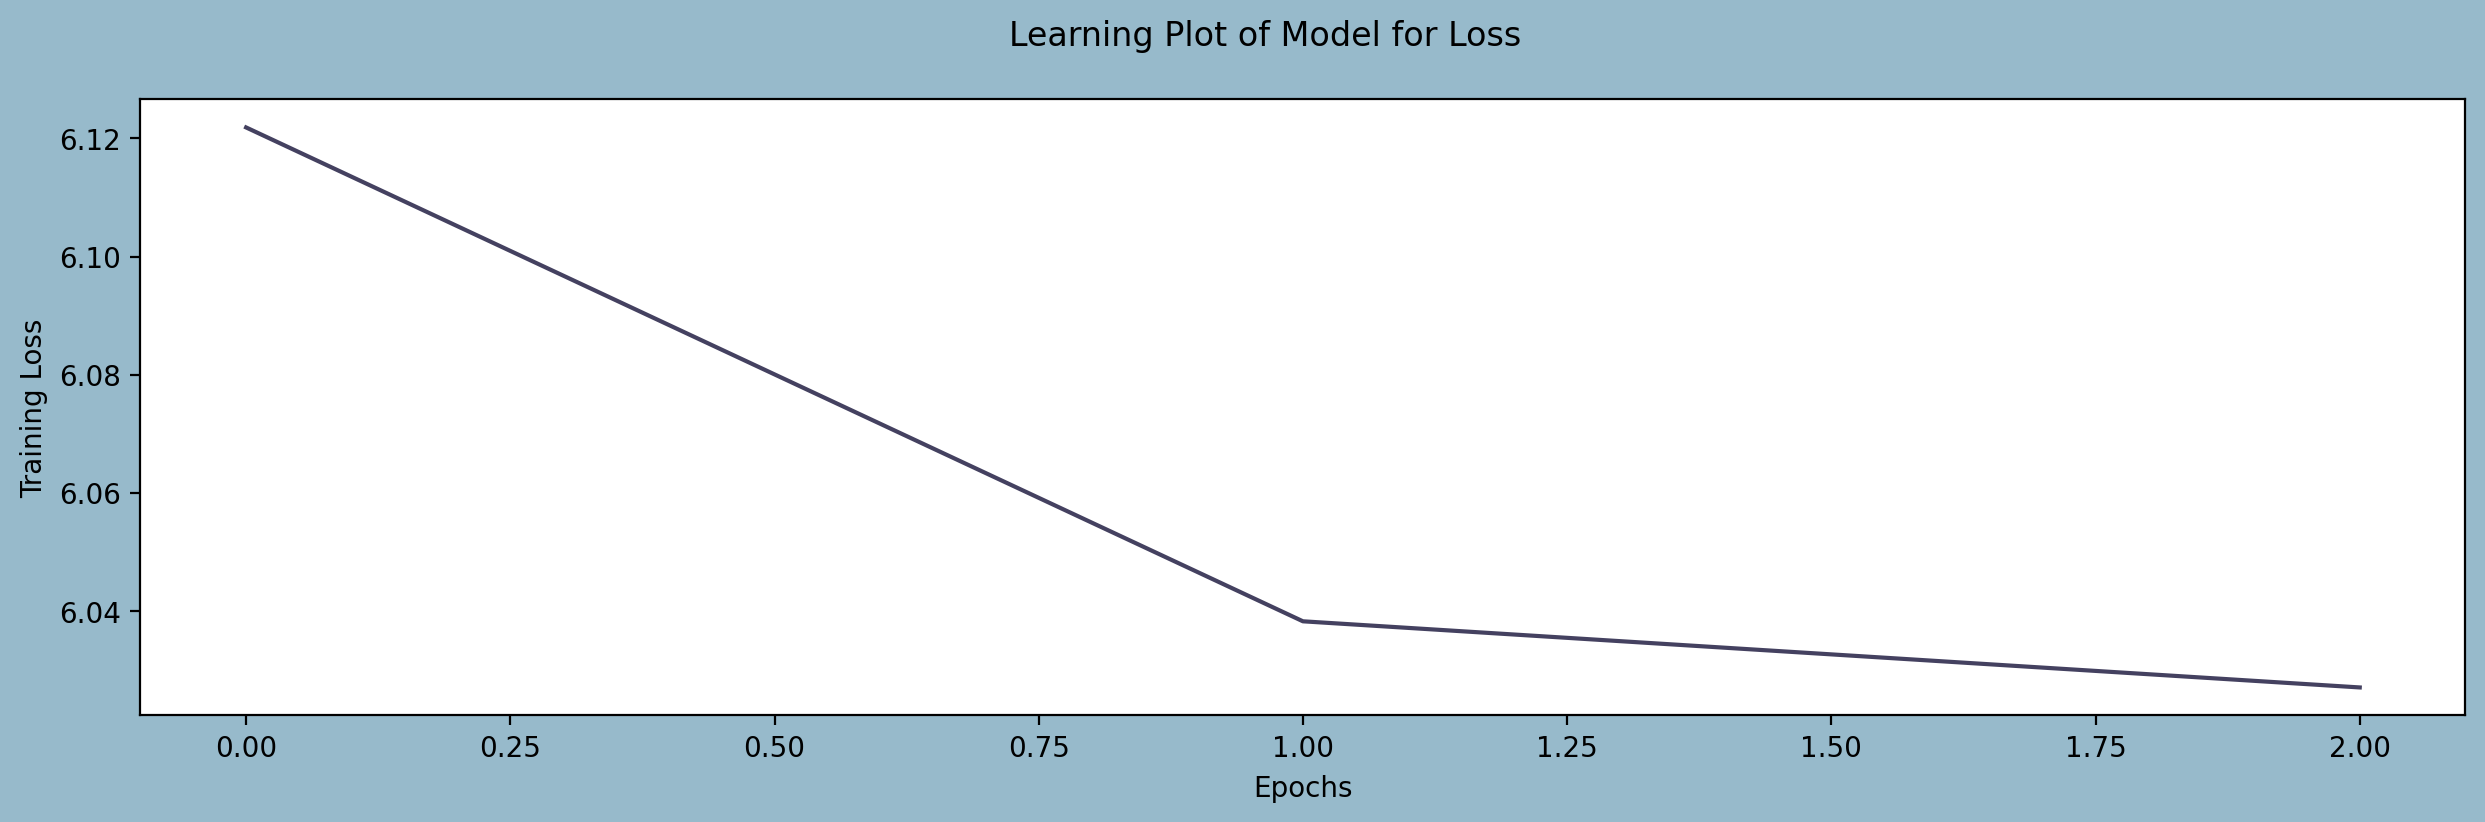

In [27]:
#Plotting the learnings 
history_df = pd.DataFrame(history.history)
fig = plt.figure(figsize=(15,4), facecolor="#97BACB")
fig.suptitle("Learning Plot of Model for Loss")
pl=sns.lineplot(data=history_df["loss"],color="#444160")
pl.set(ylabel ="Training Loss")
pl.set(xlabel ="Epochs")

**Generating the Melody**

A function to obtain the generated music

In [28]:


def preprocess_prediction(prediction): 
    L_symb_tmp = float(prediction.shape[-1])
    prediction = np.log(prediction) / 1.0 #diversity
    exp_preds = np.exp(prediction)
    prediction = exp_preds / np.sum(exp_preds)
    index = np.argmax(prediction)
    index_N = index/ float(L_symb_tmp)   
    
    return index, index_N

def Malody_Generator(Note_Count):
    notes_seed = X_seed_notes[np.random.randint(0,len(X_seed_notes)-1)]
    durations_seed = X_seed_durations[np.random.randint(0,len(X_seed_durations)-1)]
    Music = ""
    Notes_Generated=[]
    Durations_Generated=[]
    for i in range(Note_Count):
        notes_seed = notes_seed.reshape(1,length,1)
        durations_seed = durations_seed.reshape(1,length,1)
        
        note_prediction, duration_prediction = model.predict([notes_seed, durations_seed], verbose=0)
        note_index, note_index_N = preprocess_prediction(note_prediction)
        duration_index, duration_index_N = preprocess_prediction(duration_prediction)
        
        Notes_Generated.append(note_index)
        
        Music = [reverse_mapping[char] for char in Notes_Generated]
        notes_seed = np.insert(notes_seed[0],len(notes_seed[0]),note_index_N) #What is note_index_N doing for us? Something, not sure what tho. Need to double check this. 
        notes_seed = notes_seed[1:]
        
        Durations_Generated.append(duration_index)

        Music_2 = [reverse_mapping_2[char] for char in Durations_Generated]
        durations_seed = np.insert(durations_seed[0],len(durations_seed[0]),duration_index_N)
        durations_seed = durations_seed[1:]
    #Now, we have music in form or a list of chords and notes and we want to be a midi file.
    Melody = chords_n_notes(Music, Music_2) #apparently, the data inside of Music should be of type Note.note()? 
    Melody_midi = stream.Stream(Melody)   
    return Music,Melody_midi


#getting the Notes and Melody created by the model
Music_notes, Melody = Malody_Generator(100)



This sure looks like music! To check if it sounds like music we have to listen to the MIDI file. Playing midi is crumblesome. I have saved and converted a few generated melodies to ".wav" format outside of this notebook. So let us have a listen. 

**Melody Generated Sample 1**

In [29]:
#To save the generated melody
Melody.write('midi','Melody_Generated_7.mid')


# Assuming Melody_Generated.mid has been created correctly in the previous step
# and Melody_Generated 2.wav is the correct file name


#IPython.display.Audio("../input/music-generated-lstm/Melody_Generated 2.wav")

'Melody_Generated_7.mid'

**Melody Generated Sample 2**

In [30]:
#to play audio or corpus
IPython.display.Audio("../input/music-generated-lstm/Melody_Generated_1.wav")

ValueError: rate must be specified when data is a numpy array or list of audio samples.

<a id="7"></a>
# <p style="background-color:#97BACB;font-family:newtimeroman;color:#EBDDD0;font-size:120%;text-align:center;border-radius:40px 40px;">CONCLUSION</p>
<p style="font-family:newtimeroman;font-size:120%;color:#97BACB">On inspecting the generated melody, I am quite satisfied. Unlike the lyrics project, The music doesn't have to hold true to the grammatical syntax. On the question, is it a good musical composition; is it artsy? Did our LSTM create a masterpiece? I don't know! I am not a connoisseur of music. I used a basic RNN and it worked alright.</p> 

<img src="https://github.com/KarnikaKapoor/Files/blob/main/music2.gif?raw=true">     
     
     
<p style="font-family:newtimeroman;font-size:120%;color:#97BACB">So I decided to let the model have the fame it deserved. I am releasing the album! It is out on my blog. Don't forget to get your copy!</p>

**Album** [Down The Uncanny Valley: Album Release](https://karnikakapoor.blogspot.com/2021/10/down-uncanny-valley.html)

**Some Useful Resources:**

[The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness/)

[MuseNet](https://openai.com/blog/musenet/) 

[Lyrics Generator](https://www.kaggle.com/karnikakapoor/lyrics-generator-rnn)


**<span style="color:#DBACC1;"> If you liked this Notebook, please do upvote.</span>**

**<span style="color:#DBACC1;"> If you have any questions, feel free to comment!</span>**

**<span style="color:#DBACC1;"> Best Wishes!</span>**

<a id="8"></a>
# <p style="background-color:#97BACB;font-family:newtimeroman;color:#EBDDD0;font-size:120%;text-align:center;border-radius:40px 40px;">END</p>